# Linear Regression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X = [round(np.random.uniform(-10, 10), 2) for _ in range(100)]
y = [X[i]*(5+round(np.random.uniform(-3, 3), 2))+ round(np.random.uniform(-10, 10), 2) for i in range(100)]

In [26]:
data = pd.DataFrame(np.array([X,y])).T
data.columns = ['X', 'y']

In [27]:
data

,X,y
0,-9.46,-42.9952
1,-2.11,-6.2151
2,7.86,27.3478
3,9.43,70.5498
4,-0.40,-2.5340
5,-6.88,-25.9344
6,3.97,24.3447
7,1.58,2.8644
8,-9.91,-62.2549
9,3.75,16.4750


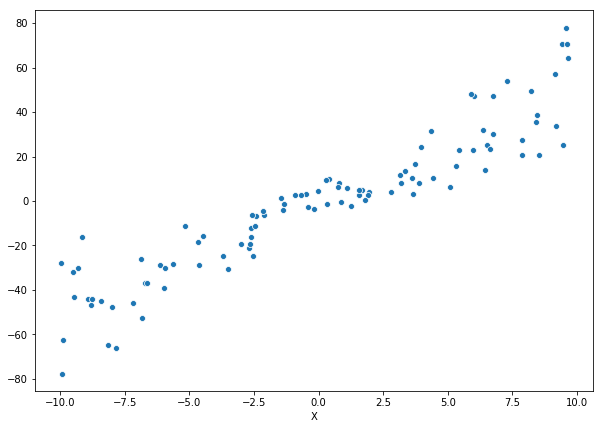

In [77]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='X', y=y, data=data)

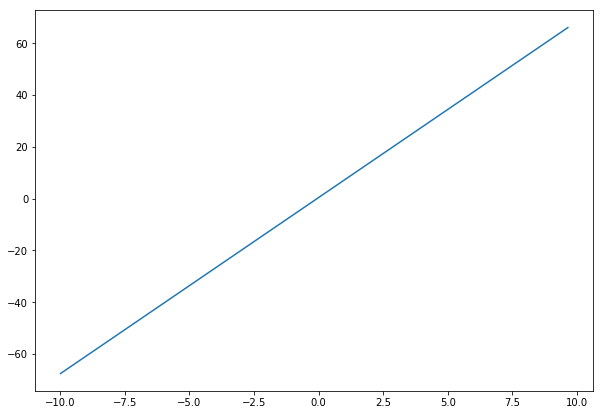

In [100]:
# Draw a line y = ax + b
a = round(np.random.uniform(-10,10), 2)
b = round(np.random.uniform(-10,10), 2)
def lin(x,a,b):
    return np.dot(x,a) + b

plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b))

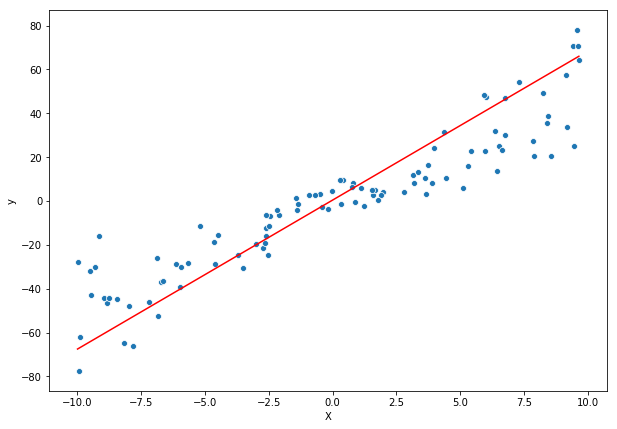

In [101]:
plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b),color="red")
sns.scatterplot(x='X', y='y', data=data)

In [102]:
a_1 = sum(np.array(np.array(X)-np.mean(data.X)) * np.array(np.array(y)-np.mean(data.y))) / sum(np.array(np.array(X)-np.mean(data.X)) * np.array(np.array(X)-np.mean(data.X)))
b_1 = np.mean(data.y) - a * np.mean(data.X)

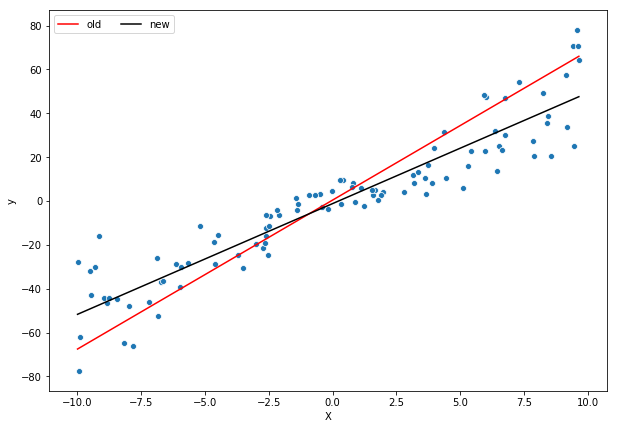

In [110]:
plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b),color="red")
sns.lineplot(X,lin(X, a_1, b_1),color="black")
sns.scatterplot(x='X', y='y', data=data)
plt.legend(['old','new'], ncol=2, loc='upper left')